In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

in this data the 891 rows and 12 columns which is combination of countinuous and categorical data and one is target variable

In [4]:
# PassengerId is uniqe identity hence its not contribute to target hence droping it
data.drop('PassengerId',axis=1,inplace=True)

In [4]:
data.shape

(891, 11)

In [5]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

ther is mix of columns such as object float and intizer hence treat with step tostep

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

we see that there is lot of nan vlaues present in the cabin columns which is impossible to fill these values without proof hence
remove this column is deleted and no much impact to our whole dataset

In [7]:
data.drop('Cabin',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
#letsfill nan values with right methods which is not much impact our data
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data['Age'].isnull().sum()

0

In [10]:
# age in float which is not possible hence convert it into intizer 
data['Age']= data['Age'].astype(int)
data['Age'].dtype

dtype('int32')

In [11]:
#again checking info
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age           int32
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [11]:
#we can find embarked column has space as valuebut it was showing 0 missing value in column lets fill this column by values
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [12]:
data.loc[data['Embarked']==' ']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [13]:
data['Embarked'] = data['Embarked'].replace(' ',np.nan)

In [14]:
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [16]:
# lets chacking statisticsofour dataset
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


above dataset wee see thereis no null present in dataset columns
1) the columns pclass median is greater than mean hence possibility present of outliers 
2) difference between 75% and max is very more in columns fare hence treating the outliers present
3) and all other values such as min 25% 50% 75% are in proper order hence no much impurties in data

In [12]:
#seprating numerical and categorical columns

#checking categerical columns\
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col) 

categorical columns: ['Name', 'Sex', 'Ticket', 'Embarked']


numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


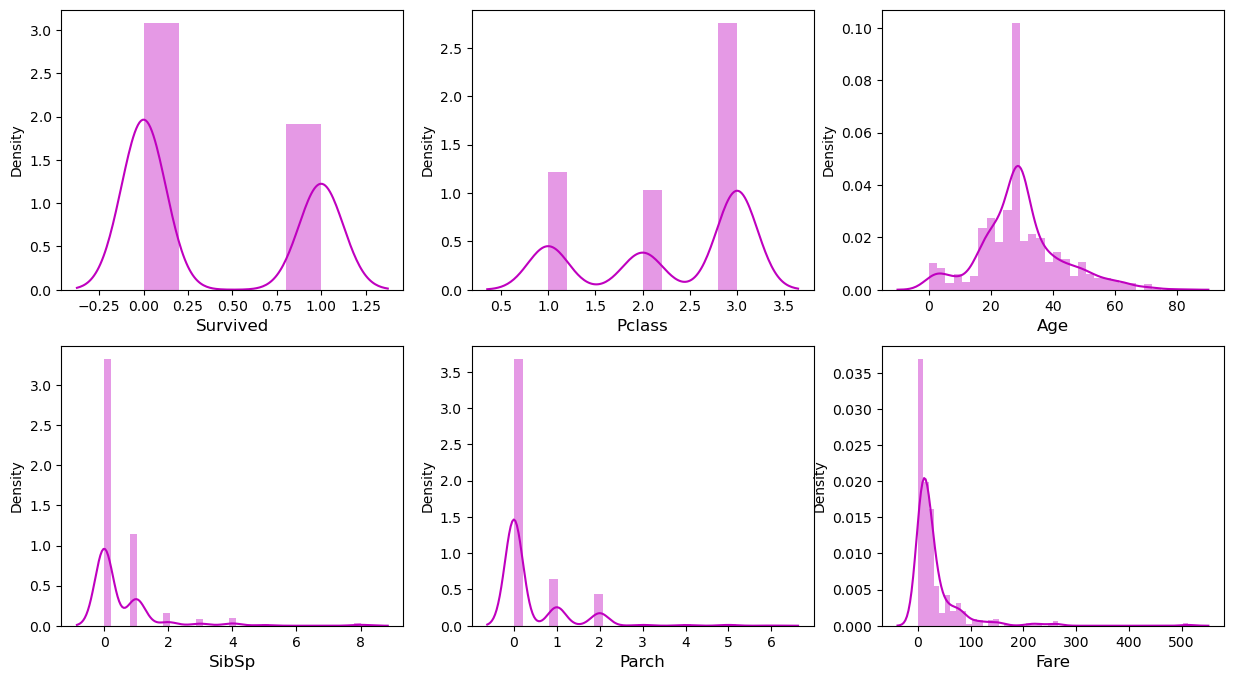

In [17]:
# checking the distribution through graph of data in each continuous coulmns
plt.figure(figsize=(15,8), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()    

we see that the columns fare and sibsp and parch data distributed but outlier is present other columns arenormally distributed data

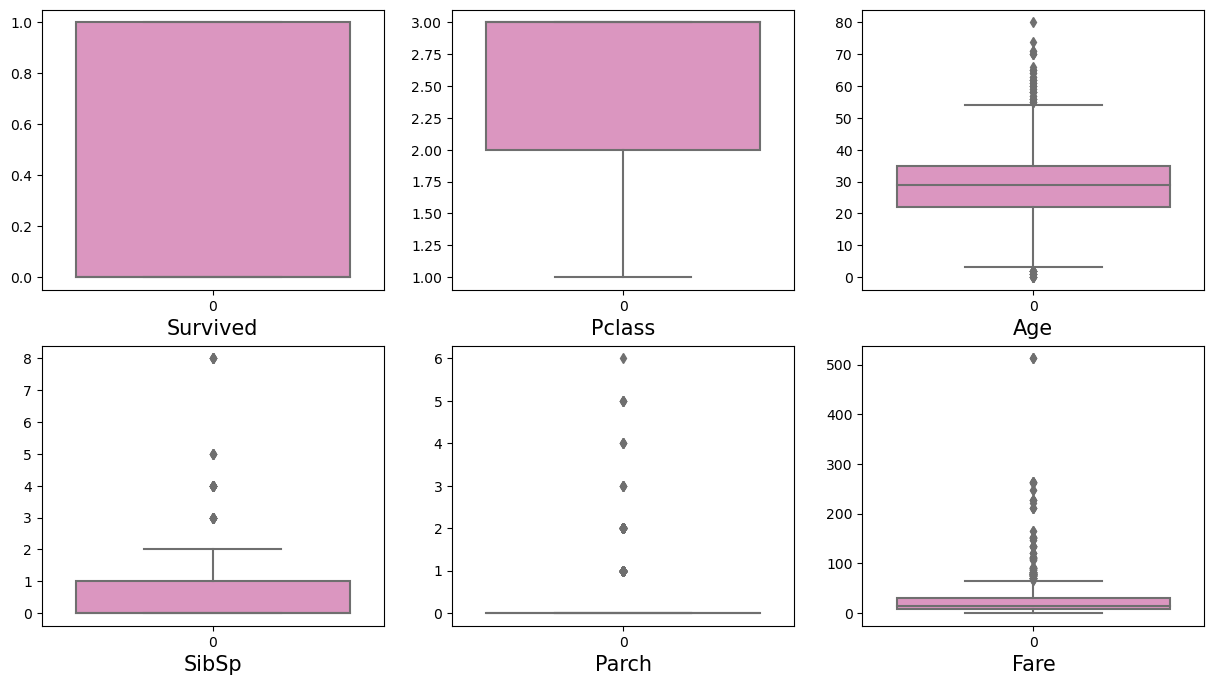

In [18]:
#lets check for outliers
plt.figure(figsize= (15,8), facecolor= 'white')
plotnumber= 1
for col in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(2,3, plotnumber)
        sns.boxplot(data[col], palette= 'Set2_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

there have  4 columns which have outliers so treat them for better performance of our model by using zscore method

In [17]:
from scipy.stats import zscore

out_features = data[['Age','SibSp','Parch','Fare']]
z= np.abs(zscore(out_features))
z

,Age,SibSp,Parch,Fare
0,0.580044,0.432793,0.473674,0.502445
1,0.650112,0.432793,0.473674,0.786845
2,0.272505,0.474545,0.473674,0.488854
3,0.419458,0.432793,0.473674,0.420730
4,0.419458,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.195620,0.474545,0.473674,0.386671
887,0.810699,0.474545,0.473674,0.044381
888,0.041851,0.432793,2.008933,0.176263
889,0.272505,0.474545,0.473674,0.044381


In [18]:
#threshold=3
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [22]:
z.iloc[299,2]

0.7676298785983874

In [19]:
# now removing data above zscore and creating new dataframe
data1 = data[(z<3).all(axis=1)]

data1.shape

(820, 10)

In [20]:
# skewness our data 
data1.skew()

Survived    0.450825
Pclass     -0.632242
Age         0.345489
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

In [21]:
#apply cube root method to remove skewness in volume
data1['SibSp']= np.cbrt(data1['SibSp'])
data1['Parch']= np.cbrt(data1['Parch'])
data1['Fare']= np.cbrt(data1['Fare'])

In [22]:
data1.skew()

Survived    0.450825
Pclass     -0.632242
Age         0.345489
SibSp       1.018770
Parch       1.643259
Fare        0.708623
dtype: float64

<Figure size 1000x600 with 0 Axes>

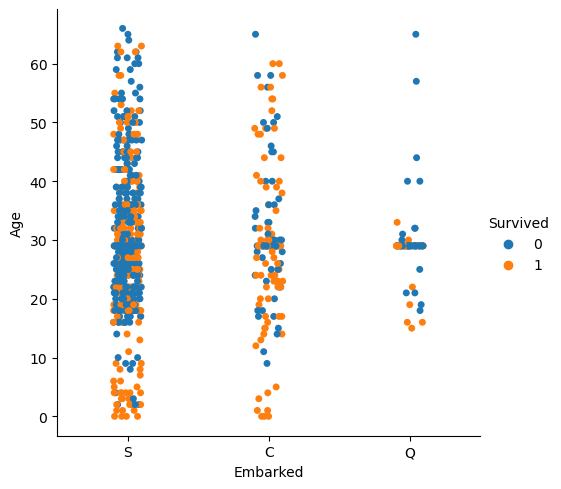

In [32]:
#vsiualize our data
plt.figure(figsize=(10,6))
sns.catplot(x='Embarked',y='Age',data=data1,hue='Survived')
plt.show()

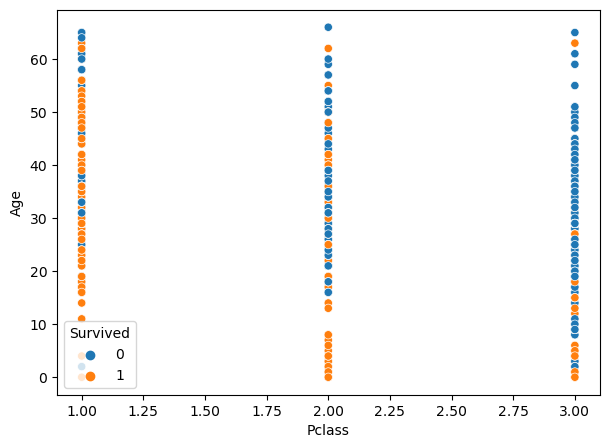

In [34]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Pclass',y='Age',data=data1,hue='Survived')
plt.show()

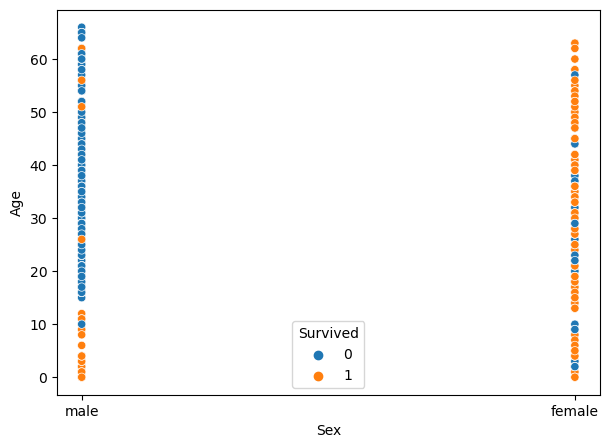

In [27]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sex',y='Age',data=data1,hue='Survived')
plt.show()

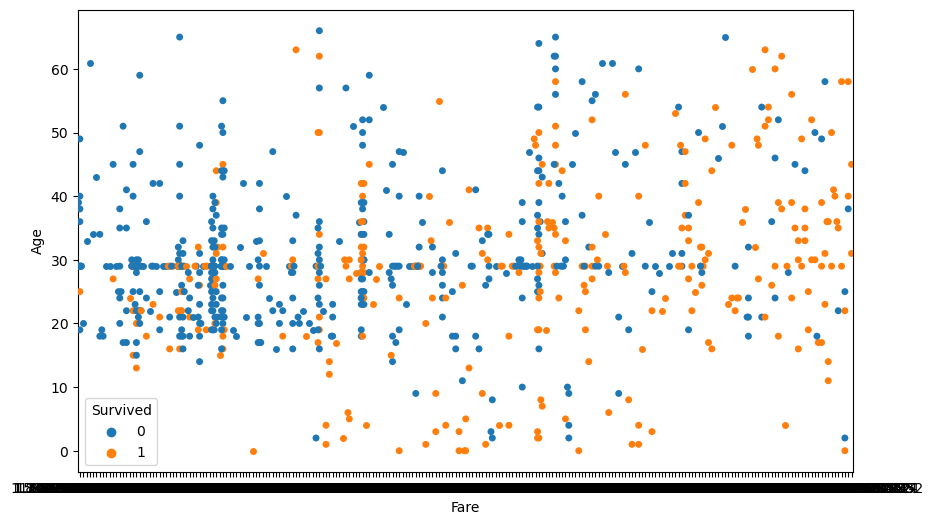

In [37]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Fare',y='Age',data=data1,hue='Survived')
plt.show()

In [23]:
#wenotice all columnscontributeto target except name and ticket hence remove this columns 
data1.drop(['Ticket','Name'],axis=1,inplace=True)

In [24]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1.0,0.0,1.935438,S
1,1,1,female,38,1.0,0.0,4.146318,C
2,1,3,female,26,0.0,0.0,1.993730,S
3,1,1,female,35,1.0,0.0,3.758647,S
4,0,3,male,35,0.0,0.0,2.004158,S


In [43]:
data1.dtypes

Survived      int64
Pclass        int64
Sex          object
Age           int32
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encode= pd.get_dummies(data1[['Sex','Embarked']])
encode

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [26]:
data2=data1.join(encode)
data2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22,1.0,0.000000,1.935438,S,0,1,0,0,1
1,1,1,female,38,1.0,0.000000,4.146318,C,1,0,1,0,0
2,1,3,female,26,0.0,0.000000,1.993730,S,1,0,0,0,1
3,1,1,female,35,1.0,0.000000,3.758647,S,1,0,0,0,1
4,0,3,male,35,0.0,0.000000,2.004158,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0.0,0.000000,2.351335,S,0,1,0,0,1
887,1,1,female,19,0.0,0.000000,3.107233,S,1,0,0,0,1
888,0,3,female,29,1.0,1.259921,2.862294,S,1,0,0,0,1
889,1,1,male,26,0.0,0.000000,3.107233,C,0,1,1,0,0


In [33]:
data2.drop(['Sex','Embarked'],axis=1,inplace=True)


In [34]:
#after encode we have check data whichis well manner
data2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.390244,2.310976,29.632927,0.301521,0.207044,2.644247,0.342683,0.657317,0.186585,0.086585,0.726829
std,0.488103,0.826678,12.168160,0.480608,0.430778,0.925570,0.474896,0.474896,0.389816,0.281398,0.445860
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,1.991279,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,2.351335,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,66.000000,1.442250,1.259921,5.483329,1.000000,1.000000,1.000000,1.000000,1.000000


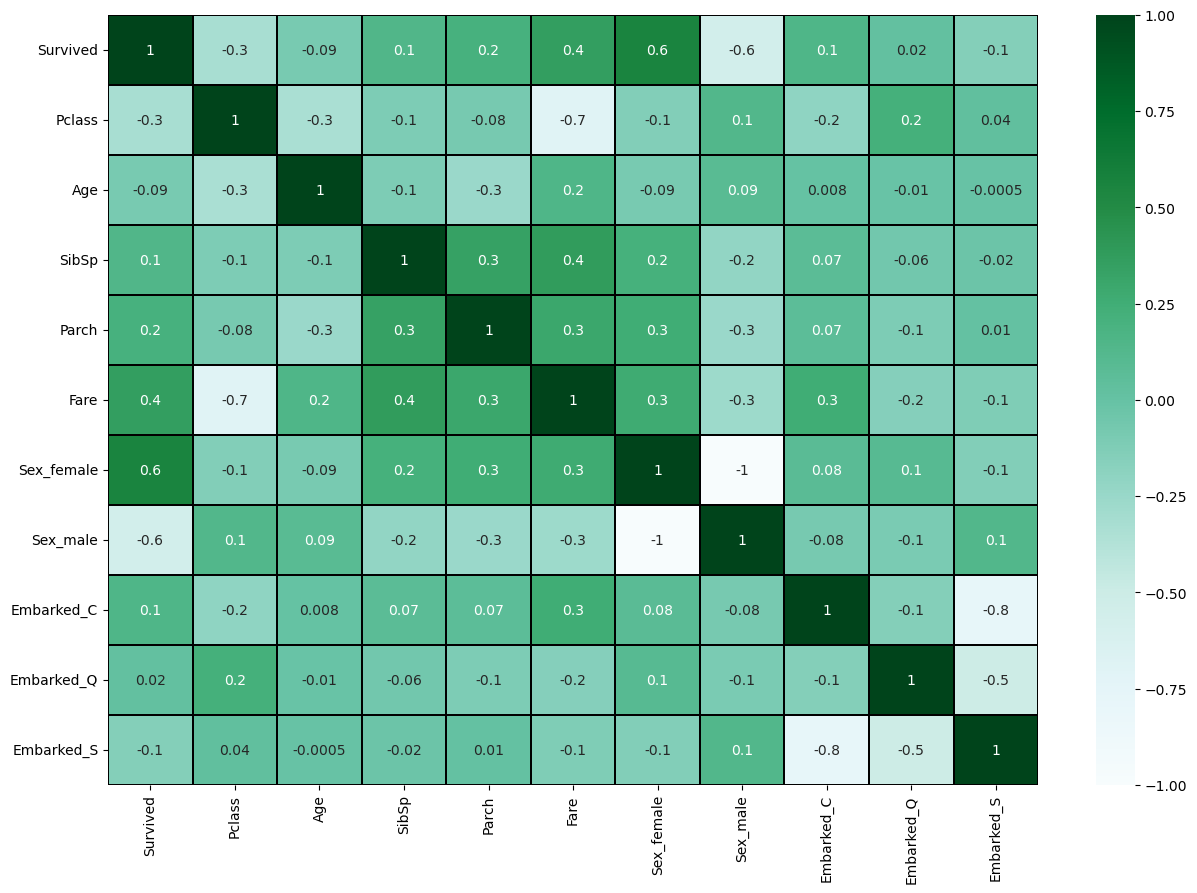

In [34]:
#checking correlation betweenvariables of features and label
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), linewidths = 0.1, fmt = '.1g', linecolor= 'black', annot = True, cmap = 'BuGn')
plt.show()

 we see that all features are well correlated with each other as well target with the perfect positive and negative correlated
    after that we standardized our data and separate target and features into two variables

In [36]:
#seperating label and features
X=data2.drop('Survived',axis=1)
Y=data2['Survived']

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1.0,0.000000,1.935438,0,1,0,0,1
1,1,38,1.0,0.000000,4.146318,1,0,1,0,0
2,3,26,0.0,0.000000,1.993730,1,0,0,0,1
3,1,35,1.0,0.000000,3.758647,1,0,0,0,1
4,3,35,0.0,0.000000,2.004158,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27,0.0,0.000000,2.351335,0,1,0,0,1
887,1,19,0.0,0.000000,3.107233,1,0,0,0,1
888,3,29,1.0,1.259921,2.862294,1,0,0,0,1
889,1,26,0.0,0.000000,3.107233,0,1,1,0,0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22,1.0,0.0,1.935438,0,1,0,0,1
1,1,38,1.0,0.0,4.146318,1,0,1,0,0
2,3,26,0.0,0.0,1.993730,1,0,0,0,1
3,1,35,1.0,0.0,3.758647,1,0,0,0,1
4,3,35,0.0,0.0,2.004158,0,1,0,0,1


In [39]:
# after scaling data we will build model and import necessary models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


In [40]:
maxacc= 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.30, random_state= i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred= rfc.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('best accuracy is', maxacc, 'at random state', maxrs)

best accuracy is 0.8577235772357723 at random state 137


In [41]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.30, random_state= maxrs)

In [42]:
Lr =  LogisticRegression()
Lr.fit(x_train,y_train)
predLr = Lr.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predLr))
print('confusion matrix :\n',confusion_matrix(y_test,predLr))
print('classification report :\n',classification_report(y_test,predLr))


accracy_score :
 0.7886178861788617
confusion matrix :
 [[121  24]
 [ 28  73]]
classification report :
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       145
           1       0.75      0.72      0.74       101

    accuracy                           0.79       246
   macro avg       0.78      0.78      0.78       246
weighted avg       0.79      0.79      0.79       246



In [43]:
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
predgbt = gbt.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predgbt))
print('confusion matrix :\n',confusion_matrix(y_test,predgbt))
print('classification report :\n',classification_report(y_test,predgbt))


accracy_score :
 0.8130081300813008
confusion matrix :
 [[131  14]
 [ 32  69]]
classification report :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       145
           1       0.83      0.68      0.75       101

    accuracy                           0.81       246
   macro avg       0.82      0.79      0.80       246
weighted avg       0.82      0.81      0.81       246



In [44]:
ada = AdaBoostClassifier() 
ada.fit(x_train,y_train)
predada = ada.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predada))
print('confusion matrix :\n',confusion_matrix(y_test,predada))
print('classification report :\n',classification_report(y_test,predada))

accracy_score :
 0.7764227642276422
confusion matrix :
 [[123  22]
 [ 33  68]]
classification report :
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       145
           1       0.76      0.67      0.71       101

    accuracy                           0.78       246
   macro avg       0.77      0.76      0.76       246
weighted avg       0.77      0.78      0.77       246



In [45]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predknn))
print('confusion matrix :\n',confusion_matrix(y_test,predknn))
print('classification report :\n',classification_report(y_test,predknn))

accracy_score :
 0.7804878048780488
confusion matrix :
 [[126  19]
 [ 35  66]]
classification report :
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       145
           1       0.78      0.65      0.71       101

    accuracy                           0.78       246
   macro avg       0.78      0.76      0.77       246
weighted avg       0.78      0.78      0.78       246



In [46]:
#lets checking crooss validation across models
cv=3
score= cross_val_score(gbt,X,Y,cv=3)
print(score)
print('mean :',score.mean())

[0.78467153 0.86080586 0.81318681]
mean : 0.8195547356131297


In [47]:
score= cross_val_score(Lr,X,Y,cv=3)
print(score)
print('mean :',score.mean())

[0.77372263 0.78021978 0.7985348 ]
mean : 0.7841590688306018


In [48]:
score= cross_val_score(ada,X,Y,cv=3)
print(score)
print('mean :',score.mean())

[0.75182482 0.80586081 0.81318681]
mean : 0.7902908121886224


In [49]:
score= cross_val_score(rfc,X,Y,cv=3)
print(score)
print('mean :',score.mean())

[0.77372263 0.81684982 0.79487179]
mean : 0.7951480798196126


In [57]:
from sklearn .model_selection import GridSearchCV

In [60]:
params = {'n_estimators':[10,50,100], 'max_leaf_nodes':[10,30,50],'learning_rate':[0.1,1,0.05]}

In [61]:
search_cv= GridSearchCV(GradientBoostingClassifier(),params,cv=3)
search_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 1, 0.05],
                         'max_leaf_nodes': [10, 30, 50],
                         'n_estimators': [10, 50, 100]})

In [62]:
search_cv.best_params_

{'learning_rate': 0.05, 'max_leaf_nodes': 10, 'n_estimators': 100}

In [65]:
final_model = GradientBoostingClassifier(n_estimators=100,max_leaf_nodes=10,learning_rate=0.05)
final_model.fit(x_train,y_train)
pred1 = final_model.predict(x_test)
acc = accuracy_score(y_test,pred1)
print(acc)

0.8292682926829268


 after checking cross validation and accuracy score then we say that gradient boosting classifier is our best model for prediction

In [56]:
# lets checking the roc auc graph for performance ofmodel
from sklearn import metrics
from sklearn.metrics import roc_auc_score


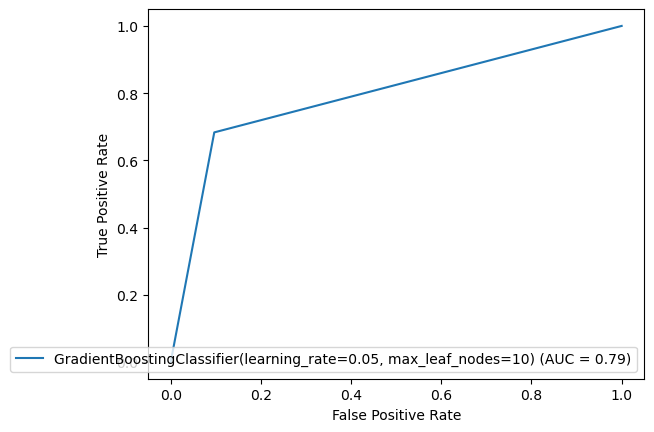

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predgbt)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name= final_model)
display.plot()

here the plot is roc curve and auc value of our model is 82% 